In [1]:
import numpy as np
from scipy.stats import multivariate_normal as norm
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Loading the training and test data

## Train data

In [2]:
train5 = np.loadtxt("mnist_all/train5.txt")/255 # /255 for normalization
train6 = np.loadtxt("mnist_all/train6.txt")/255
train8 = np.loadtxt("mnist_all/train8.txt")/255

In [3]:
# Define targets 
train5_target = 5*np.ones(len(train5))
train6_target = 6*np.ones(len(train6))
train8_target = 8*np.ones(len(train8))


In [4]:
# Combine data
train_data = np.concatenate([train5, train6, train8])
train_targets = np.concatenate([train5_target, train6_target, train8_target])

## Test data

In [5]:
test5 = np.loadtxt("mnist_all/test5.txt")/255
test6 = np.loadtxt("mnist_all/test6.txt")/255
test8 = np.loadtxt("mnist_all/test8.txt")/255

# Define targets 
test5_target = 5*np.ones(len(test5))
test6_target = 6*np.ones(len(test6))
test8_target = 8*np.ones(len(test8))

# Combine
test_data = np.concatenate([test5, test6, test8])
test_targets = np.concatenate([test5_target, test6_target, test8_target])

# Class names
classes = np.array([5,6,8])

# Part 1: Reduce dimension to 2
Here, we wish to reduce the data dimensionality from 784 to 2 using either PCA or LDA.
For this you can use scikit-learn.

## PCA

The PCA class in scikit-learn fits a covariance matrix and compute eigenvectors for you. 
PCA doesn't assume any knowledge about the classes, so you have to use the concatenated training set.

In [6]:
# Fit a scikit learn PCA instance to training data
pca = PCA(n_components=2)
pca.fit(train_data)


PCA(n_components=2)

Now that the PCA model is fit to the training data, we can find a low dimesional representation of each class.

In [15]:
# Transform train data from each class using fitted PCA instance

train5_pca = pca.transform(train5)
train6_pca = pca.transform(train6)
train8_pca = pca.transform(train8)

print(train5_pca.shape)



(5421, 2)


## LDA
We can also use Linear Disicriminant Analysis to reduce the dimensionality of the data.
The LDA class in scikit-learn fits a covariance matrix and compute eigenvectors for you. LDA assume that you know about the classes, so you have to use the concatenated training set and targets/classes

In [26]:
# Fit a scikit learn LDA instance to training data
lda = LDA(n_components=2)
lda.fit(train_data,train_targets)

LinearDiscriminantAnalysis(n_components=2)

In [29]:
# Transform train data from each class using fitted LDA instance
train5_lda = lda.transform(train5)
train6_lda = lda.transform(train6)
train8_lda = lda.transform(train8)

Let's try to plot the dimensionality reduced data and compare PCA to LDA. What do we see?

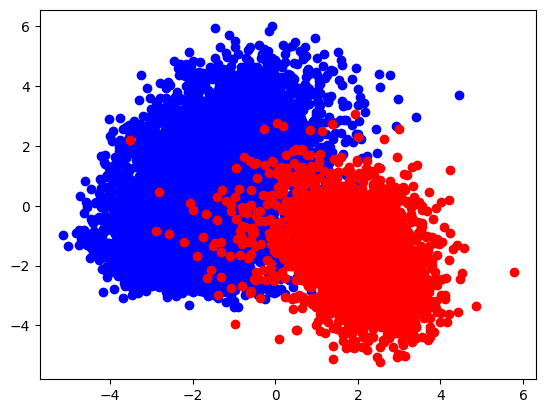

In [37]:
#Scatter plot of the dimensional-reduced data 

plt.scatter(train8_pca[:,0],train8_pca[:,1],c='#0000FF')
plt.scatter(train8_lda[:,0],train8_lda[:,1],c='#FF0000')
plt.show()

In the above plot we see that LDA is seemingly better at seperating the tree classes,while the classes 5 and 8 are highly overlapped when using PCA.

# Part 2: Perform 3-class classification based on the generated 2-dimensional data. 
We need to find a model to classify the test data as either 5, 6, or 8.
Here, we could use a Gaussian model for each class, and estimate the mean and covariance from the dimensionality reduced data.

## Estimate Gaussians using 2-dimensional data obtained from PCA

In [38]:
#Estimate parameters for a bivariante Gaussian distribution.
train5_mean_pca = np.mean(train5_pca, axis=0)
train6_mean_pca = np.mean(train6_pca, axis=0)
train8_mean_pca = np.mean(train8_pca, axis=0)

train5_cov_pca = np.cov(train5_pca, rowvar=False)
train6_cov_pca = np.cov(train6_pca, rowvar=False)
train8_cov_pca = np.cov(train8_pca, rowvar=False)


## Estimate Gaussians using 2-dimensional data obtained from LDA

In [39]:
#Estimate parameters for a bivariante Gaussian distribution.
train5_mean_lda = np.mean(train5_lda, axis=0)
train6_mean_lda = np.mean(train6_lda, axis=0)
train8_mean_lda = np.mean(train8_lda, axis=0)

train5_cov_lda = np.cov(train5_lda, rowvar=False)
train6_cov_lda = np.cov(train6_lda, rowvar=False)
train8_cov_lda = np.cov(train8_lda, rowvar=False)

## Classifying test data
To classify the test data, we first transform it to 2-dimensions as well.

In [40]:
# Transform test data using fitted PCA/LDA instance

test_data_pca = pca.transform(test_data)
print(test_data_pca.shape)

test_data_lda = lda.transform(test_data)

(2824, 2)


Now we compute priors, likelihoods and posteriors

In [41]:
# Compute priors
# Compute Likelihoods
# Compute posteriors




priors_5 = (train_targets==5).sum()/len(train_targets)
priors_6 = (train_targets==6).sum()/len(train_targets)
priors_8 = (train_targets==8).sum()/len(train_targets)


#PCA
likelihood_value_5_pca = norm.pdf(test_data_pca, train5_mean_pca, train5_cov_pca)
likelihood_value_6_pca = norm.pdf(test_data_pca, train6_mean_pca, train6_cov_pca)
likelihood_value_8_pca = norm.pdf(test_data_pca, train8_mean_pca, train8_cov_pca)


posteriors_5_pca = likelihood_value_5_pca * priors_5
posteriors_6_pca = likelihood_value_6_pca * priors_6
posteriors_8_pca = likelihood_value_8_pca * priors_8

posteriors_pca = [posteriors_5_pca, posteriors_6_pca, posteriors_8_pca]

#LDA

likelihood_value_5_lda = norm.pdf(test_data_lda, train5_mean_lda, train5_cov_lda)
likelihood_value_6_lda = norm.pdf(test_data_lda, train6_mean_lda, train6_cov_lda)
likelihood_value_8_lda = norm.pdf(test_data_lda, train8_mean_lda, train8_cov_lda)


posteriors_5_lda = likelihood_value_5_lda * priors_5
posteriors_6_lda = likelihood_value_6_lda * priors_6
posteriors_8_lda = likelihood_value_8_lda * priors_8

posteriors_lda = [posteriors_5_lda, posteriors_6_lda, posteriors_8_lda]




We can now compute the classification accuracy for both PCA and LDA

In [42]:
#Compute predictions

#PCA
predicted_class_pca = np.argmax(posteriors_pca, axis=0)

predicted_class_pca[predicted_class_pca==0] = 5
predicted_class_pca[predicted_class_pca==1] = 6
predicted_class_pca[predicted_class_pca==2] = 8

#LDA
predicted_class_lda = np.argmax(posteriors_lda, axis=0)

predicted_class_lda[predicted_class_lda==0] = 5
predicted_class_lda[predicted_class_lda==1] = 6
predicted_class_lda[predicted_class_lda==2] = 8



#Compute accuracy

#PCA
accuracy_count_pca = np.where(predicted_class_pca == test_targets, 1, 0)
accuracy_pca = (np.sum(accuracy_count_pca)/len(accuracy_count_pca)) * 100

print("The calculated pca accuracy is: ", accuracy_pca,"%")


#LDA
accuracy_count_lda = np.where(predicted_class_lda == test_targets, 1, 0)
accuracy_lda = (np.sum(accuracy_count_lda)/len(accuracy_count_lda)) * 100

print("The calculated lda accuracy is: ", accuracy_lda,"%")


The calculated pca accuracy is:  71.03399433427762 %
The calculated lda accuracy is:  94.47592067988668 %


What does the results show?